## Case BI - Análise de Dados
Esse Jupyter Notebook tem como objetivo expor os códigos e cálculos que foram utilizados para preparar a apresentação. 
Ele contém alguns comentários breves dentro do próprio código que auxiliam na compreensão do raciocínio, além de uma separação por tópicos.


<b>1º Passo</b> 

`Importação da base de dados e bibliotecas, breve exploração dos dados e filtragem.`

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
fonte = 'https://github.com/mrnecosta/CasePetLoveDataAnalyst/blob/main/data-test-analytics.csv?raw=true'
dados_pet = pd.read_csv(fonte, parse_dates=True)
dados_pet.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


<b>2º Passo + Aprendizados</b> 

`Extração de dados sobre o perfil dos clientes que cancelaram assinatura.`

In [2]:

"""
Em determinadas datas da coluna ['birth_date'] o ano de nascimento está errado.
Isso acontece por que quando os anos de 2 dígitos são analisados, 
eles são convertidos de acordo com os padrões POSIX e ISO C:
os valores 69–99 são mapeados para 1969–1999 e os valores 0–68 são mapeados para 2000–2068. 
Documentação do erro: (https://python.readthedocs.io/en/stable/library/time.html).
Aceito sugestões de como corrigir o erro.
"""
dados_pet.loc[:,'deleted_at'] = dados_pet['deleted_at'].astype('datetime64[ns]')
dados_pet.loc[:,'birth_date'] = dados_pet['birth_date'].astype('datetime64[ns]')
dados_pet.loc[:,'created_at'] = dados_pet['created_at'].astype('datetime64[ns]')
dados_pet.loc[:,'last_date_purchase'] = dados_pet['last_date_purchase'].astype('datetime64[ns]')

"""Cópia da base de dados original. Todas as modificações futuras serão feitas nas CÓPIAS."""
dados_petCopy = dados_pet.copy()

"""Cópia que contém dados apenas de assinaturas pausadas."""
dados_petPaused = dados_pet[dados_pet.status == 'paused'].copy() 

"""Retirando valores vazios"""
dados_petCopy.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

"""Calculando o período de assinatura"""
dados_petCopy['periodo'] = (dados_petCopy['deleted_at'] - dados_petCopy['created_at'])

In [3]:
"""
Apresentação de resultados
"""
print('--'*30)
print('Perfil geral dos clientes que cancelaram assinatura')
print('--'*30)

print('Média do total de receita do cliente: R$',f"{dados_petCopy['all_revenue'].mean():.2f}",'\n') 

print('Média da quantidade de itens pedidos: ', f"{dados_petCopy['items_quantity'].mean():.2f}",'\n') 

print('Média do período da assinatura: ', dados_petCopy['periodo'].mean(),'\n')

print('Média de valor gasto por pedido: R$',f"{dados_petCopy['average_ticket'].mean():.2f}",'\n')


------------------------------------------------------------
Perfil geral dos clientes que cancelaram assinatura
------------------------------------------------------------
Média do total de receita do cliente: R$ 1059.41 

Média da quantidade de itens pedidos:  8.65 

Média do período da assinatura:  472 days 04:48:01.306930688 

Média de valor gasto por pedido: R$ 217.44 



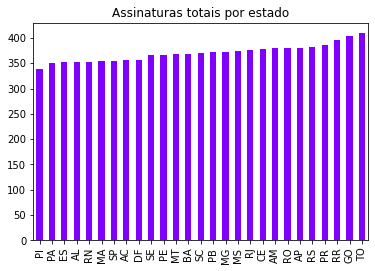

In [4]:
"""
Contagem de assinaturas totais por estado. 
"""
dados_pet['state'].value_counts().sort_values(ascending=True).plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Assinaturas totais por estado")
plt.show()

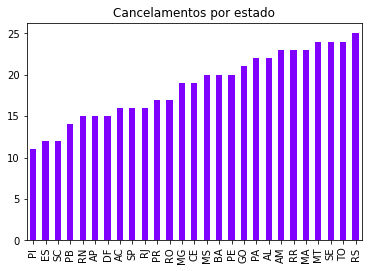

In [5]:
"""
Qual o número de cancelamentos de assinatura por estado?
"""

dados_petCopy['state'].value_counts().sort_values(ascending=True).plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Cancelamentos por estado")
plt.show()

organic_search       196
direct                96
paid_search           70
telegram_whatsapp     66
crm                   43
none                  34
Name: marketing_source, dtype: int64


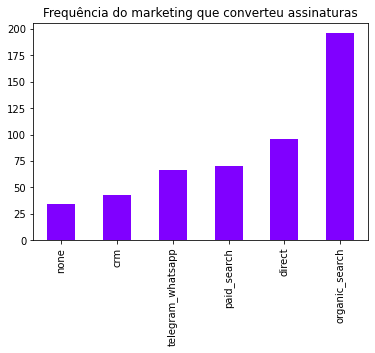

In [6]:
"""
Qual canal de marketing mais converteu as assinaturas? 
"""
freqMkt = dados_petCopy['marketing_source'].value_counts()
print(freqMkt)
dados_petCopy['marketing_source'].value_counts().sort_values().plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Frequência do marketing que converteu assinaturas")
plt.show()

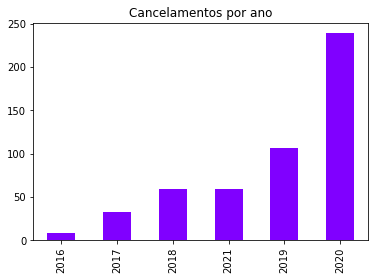

In [7]:
"""
Frequência de cancelamentos por ano
"""
dados_petCopy['deleted_year'] = dados_petCopy['deleted_at'].dt.year
dados_petCopy['deleted_year'].value_counts().sort_values(ascending=True).plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Cancelamentos por ano")
plt.show()

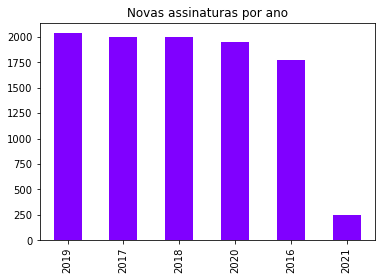

In [8]:
"""
Criação de novas contas
"""
dados_pet['created_year'] = dados_pet['created_at'].dt.year
dados_pet['created_year'].value_counts().sort_values(ascending=False).plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Novas assinaturas por ano")
plt.show()

<b>Breves insights sobre o 2º Passo</b>  
`Mapeando as características do perfil dos clientes que cancelaram é possível criar soluções de negócio direcionadas. Aliado a métricas como o Custo de aquisição dos clientes, pode-se inferir se, durante o lifetime do cliente, houve lucro ou prejuízo.
A diminuição brusca de assinaturas no ano de 2021 pode ser resultante da amostra de dados fornecida pela equipe de eng. de dados e não necessariamente reflete um problema de negócio, já que a amostra é reduzida.`

<b>Sugestões de próximos passos (3 º Passo) </b>  
`Assinaturas pausadas e data de última compra`

<b> 3 º Passo </b>

`Pausar a assinatura pode significar que o cliente está repensando como gastar seu dinheiro, testando o serviço de um concorrente ou por alguma razão os serviços prestados não lhe são mais necessários naquele período. Com isso, ao parar de receber os serviços, pode acontecer de o cliente ver menos valor no negócio, podendo vir a cancelá-lo no futuro.`

`Para diminuir o churn [futuro], olhar para os clientes com assinaturas pausadas é indispensável.`

active      8524
paused       971
canceled     505
Name: status, dtype: int64


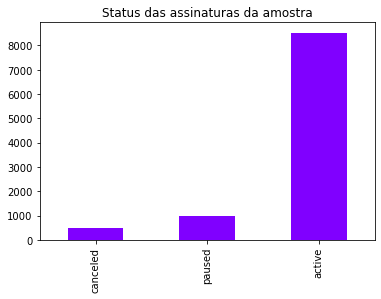

In [9]:
""" Contagem de status """
freqStatus = dados_pet['status'].value_counts()
print(freqStatus)
dados_pet['status'].value_counts().sort_values().plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Status das assinaturas da amostra")
plt.show()

In [10]:
""" Verificação do ano da data da última compra """
freqLastPurchase = dados_petPaused['last_date_purchase'].dt.year.value_counts()
print(freqLastPurchase)

2021    961
2020     10
Name: last_date_purchase, dtype: int64


`Pode-se inferir (à seguir) que a maioria das assinaturas que estão pausadas também realizaram suas últimas compras em 2021, assim, estão há pelo menos 1 ano sem realizar novas compras.`

In [11]:
""" Ocorrência de assinaturas -> status = paused E a data da última compra """
ocorr = dados_petPaused.loc[dados_petPaused["status"] == 'paused',"last_date_purchase"].value_counts(ascending=False)
print('Data e hora           Ocorrências:')
print(ocorr)


Data e hora           Ocorrências:
2021-01-15 11:23:00    73
2021-01-13 11:23:00    68
2021-01-16 11:23:00    66
2021-01-14 11:23:00    65
2021-01-12 11:23:00    62
2021-01-17 11:23:00    60
2021-01-18 11:23:00    52
2021-01-19 11:23:00    50
2021-01-20 11:23:00    46
2021-01-10 11:23:00    45
2021-01-09 11:23:00    40
2021-01-08 11:23:00    39
2021-01-11 11:23:00    37
2021-01-22 11:23:00    37
2021-01-21 11:23:00    36
2021-01-06 11:23:00    28
2021-01-07 11:23:00    28
2021-01-23 11:23:00    19
2021-01-24 11:23:00    19
2021-01-04 11:23:00    16
2021-01-05 11:23:00    15
2021-01-03 11:23:00    14
2021-01-02 11:23:00    10
2021-01-25 11:23:00     8
2021-01-26 11:23:00     8
2021-01-27 11:23:00     6
2021-01-01 11:23:00     5
2021-01-28 11:23:00     5
2020-12-31 11:23:00     5
2020-12-28 11:23:00     2
2020-12-30 11:23:00     2
2021-01-29 11:23:00     2
2021-01-31 11:23:00     1
2021-01-30 11:23:00     1
2020-12-25 11:23:00     1
Name: last_date_purchase, dtype: int64


In [12]:
"""
Apresentação de resultados
"""
print('--'*30)
print('Perfil geral dos clientes que cancelaram assinatura')
print('--'*30)

print('Média do total de receita do cliente: R$',f"{dados_petPaused['all_revenue'].mean():.2f}",'\n') 

print('Média da quantidade de itens pedidos: ', f"{dados_petPaused['items_quantity'].mean():.2f}",'\n') 

print('Média de valor gasto por pedido: R$',f"{dados_petPaused['average_ticket'].mean():.2f}",'\n')


------------------------------------------------------------
Perfil geral dos clientes que cancelaram assinatura
------------------------------------------------------------
Média do total de receita do cliente: R$ 1188.21 

Média da quantidade de itens pedidos:  8.62 

Média de valor gasto por pedido: R$ 218.04 



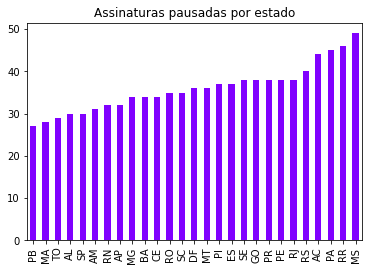

In [13]:
"""
Qual o número de assinaturas pausadas por estado?
"""
dados_petPaused['state'].value_counts().sort_values(ascending=True).plot(kind='bar',stacked=True, colormap='rainbow')

plt.title("Assinaturas pausadas por estado")
plt.show()

organic_search       385
direct               181
paid_search          149
crm                  112
telegram_whatsapp     88
none                  56
Name: marketing_source, dtype: int64


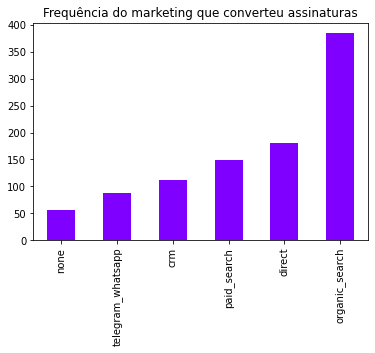

In [14]:
"""
Qual canal de marketing mais converteu as assinaturas? 
"""
dados_petPaused['marketing_source'].value_counts().sort_values().plot(kind='bar',stacked=True, colormap='rainbow')
Mkt = dados_petPaused['marketing_source'].value_counts()
print(Mkt)

plt.title("Frequência do marketing que converteu assinaturas")
plt.show()

`Assim como visto no perfil dos clientes que cancelaram assinatura, o marketing tráfego orgânico também apresenta maior frequência no caso de clientes que pausaram assinatura.` 

`Consequentemente, durante a busca orgânica, o cliente é inevitavelmente exposto a empresas concorrentes, situação que pode induzir tanto ao cancelamento quanto à pausa da assinatura.` 

<b>Conclusões</b>  
A ideia geral da análise foi mapear o perfil dos clientes que cancelaram a assinatura e extrair insights sobre. Como Próximos Passos, a ideia foi olhar para clientes que possuem maior probabilidade de no futuro cancelarem a assinatura, aumentando o churn, que são clientes com status "pausado". Apesar disso, é importante compreender o motivo que fez o cliente optar por cancelar o serviço, isso pode ser feito com pesquisas de satisfação/feedbacks dados pelo próprio cliente.

Em relação à coluna "versões", não foram encontradas "anormalidades" (ex.: alto número de cancelamentos relacionados a uma versão específica), por isso as versões não foram citadas.


<b>Observações Gerais</b>  
O cancelamento em um baixo período de tempo pode significar que o cliente aproveitou promoções especiais de primeira compra, por exemplo, ou tinha uma única necessidade específica que foi sanada (ex.: falta de estoque do produto em uma loja física) e não refletem necessariamente um problema de negócio que demande alta atenção, como seria no caso do cancelamento de um cliente que já estava fidelizado com a marca. O segundo caso é mais difícil de explicar.




